<a href="https://colab.research.google.com/github/OumaymaRedissi/IAA-DM-Labs/blob/main/IAA_ML_BasicPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Machine learning 

## Basic Pipeline

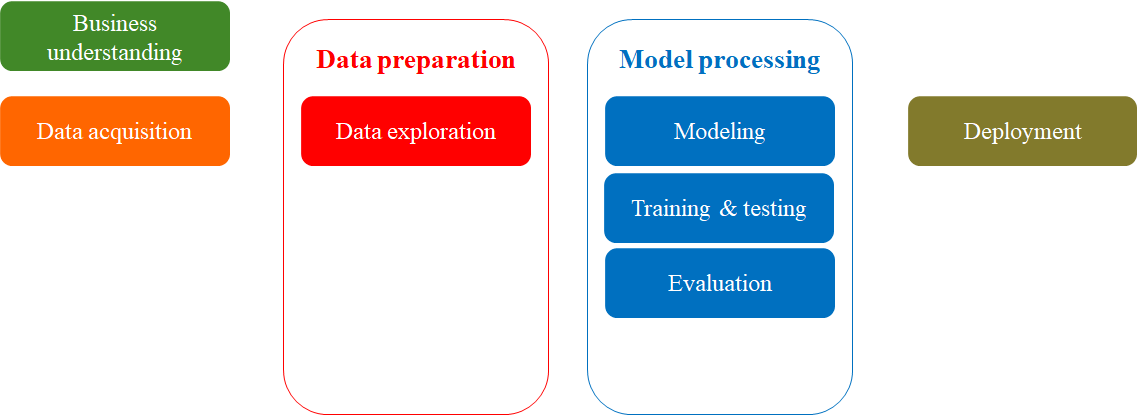

## Outils

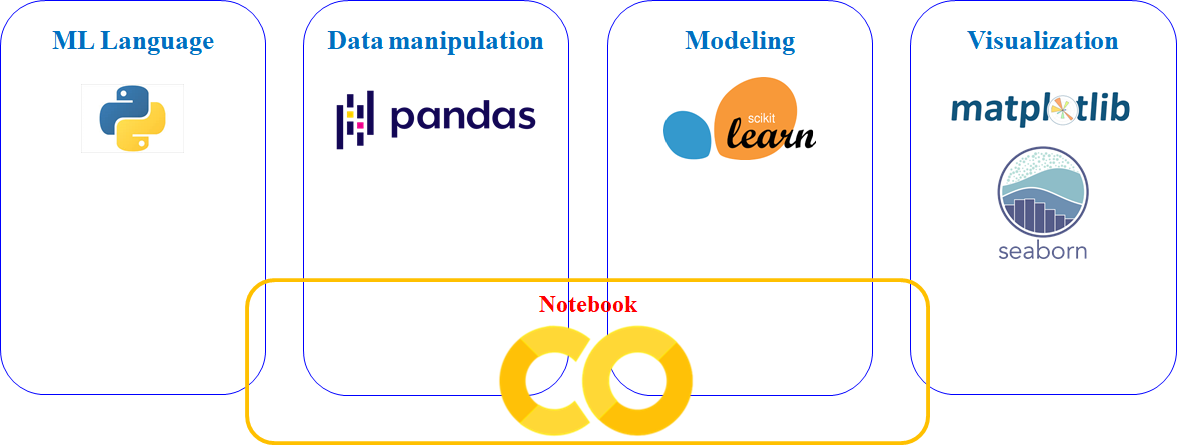

In [ ]:
# Pour installer pandas s'il n'existe pas sur votre système
!pip install pandas

---
# **Etape 0 - Business understanding** 
---

1. Travailler avec le spécialiste du domaine pour identifier les **objectifs** métiers (détecter, dénombrer, …)
2. Définir les **besoins** métiers (classification binaire, classification non  binaire, régression, recommandation, …)
3. Comprendre les **problèmes** métiers (données labélisées ou non, données manquantes ou non, …)
4. Traduire les objectifs, les besoins et les problèmes métiers en des définitions appropriées en ML




---
# **Etape 2 - Data Preparation**
---

## **1 - Data acquisition** 

In [ ]:
# Il faut toujours commencer par importer pandas qui est un outil open source d'analyse et de manipulation de données
import pandas as pd 

### **1.1. Types de fichier de données**

Le fichier des données peut être de n'importe quel type :



In [ ]:
data = pd.read_csv('data/fichier1.csv')   # Fichier CSV
data = pd.read_excel('data/fichier2.xls') # Fichier excel
data = pd.read_json('data/fichier3.json') # Fichier json

### **1.2. Fichier local**

#### A - Importer un fichier au système de fichiers local de colab

**<code>files.upload</code>** affiche un dictionnaire des fichiers importés.
Ce dictionnaire est identifié par le nom du fichier, et les valeurs sont les données qui ont été importées.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Fichier importé : "{name}" avec une taille de {length} octets'.format(
      name=fn, length=len(uploaded[fn])))

#### B - Télécharger un fichier depuis le système de fichiers local de colab

**<code>files.download</code>** appelle le téléchargement du fichier sur votre ordinateur local via un navigateur.


In [ ]:
from google.colab import files

with open('/content/sample_data/README.md', 'w') as f:
  
  f.write('************** Nouveau texte dans le fichier ***************')

files.download('/content/sample_data/README.md')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **1.3. Fichier externe**

#### A - Google drive 

In [ ]:
# Il faut monter Google Drive, ensuite ouvrir le fichier en précisant son chemin
from google.colab import drive
drive.mount('/google_drive',force_remount=True)
%cd /google_drive



In [ ]:
# Lecture à partir du poit du montage
import pandas as pd 
data = pd.read_csv('')

#### B - Google sheet
Les exemples ci-dessous utilisent la bibliothèque Open Source <a href="https://github.com/burnash/gspread"><code>gspread</code></a> pour interagir avec Google Sheets.



In [ ]:
# Il faut commencer par installer le package en utilisant l'outil gspread

!pip install --upgrade gspread


# Ensuite, il faut importer la bibliothèque, s'authentifier et créer l'interface avec Sheet

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# Créer une feuille googlesheet avec des données

sh = gc.create('exemple_sheet')
worksheet = gc.open('exemple_sheet').sheet1

# Remplir la feuille googlesheet créée 
cell_list = worksheet.range('A1:C2')

import random
for cell in cell_list:
  cell.value = random.randint(1, 10)

worksheet.update_cells(cell_list)

In [ ]:
# Télécharger des données d'une feuille googlesheet

worksheet = gc.open('exemple_sheet').sheet1

# Récupérer toutes les valeurs 
rows = worksheet.get_all_values()
print(rows)


pd.DataFrame.from_records(rows)

#### C - Sklearn 

In [ ]:
from sklearn import datasets

# Importation des données  
iris = datasets.load_iris()

#### D - Kaggle

In [ ]:
# il faut comencer par installer kaggle

!pip install -q kaggle

from google.colab import files
uploaded = files.upload()

!mkdir ~/.kaggle1
!cp kaggle.json /root/.kaggle1

#### E - Facebook

In [ ]:
# From Facebook
!pip install facebook-scraper

from facebook_scraper import get_posts

for post in get_posts('nintendo', pages=2):
    print(post)

## **2 - Data Exploration** 

On va traiter l'exemple de classification des fleurs disponibles sur le lien [Iris](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

#### 2.1. Affichage des informations 

In [ ]:
import pandas as pd

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
data

In [ ]:
# Peaufinage de l'afficahge des données

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                   names = ['Longueur_sepale','Largeur_sepale','Longueur_petal', 'Largeur_petal', 'Classe'])
data

In [ ]:
# Afficage des premières lignes 

data.head() 

In [ ]:
# Afficage des dernières lignes 

data.tail() 

In [ ]:
# Forme de la matrice des données : lignes x colonnes ?

data.shape

In [ ]:
# Affichage d'une description sur les données 

data.describe()

In [ ]:
# Affichage des colonnes

data.columns

In [ ]:
# Affichage des valeurs de certaines colonnes

data[['Longueur_sepale','Largeur_petal']]

In [ ]:
# Affichage des types des champs 

data.dtypes

### 2.2. Filtrage des données

In [ ]:
# Filtrage avec condition simple

data[data['Longueur_sepale'] < 5 ] 

In [ ]:
# Filtrage avec conditions multiples : et ( & ),  ou ( | )

data[ (data['Largeur_sepale'] > 4.0) & (data['Largeur_petal'] < 2 ) ] 

### 2.3. Suppression de certaines informations

In [ ]:
# Suppression de certaines colonnes (axis=1) sur place (inplace=True)

data.drop(['Longueur_sepale', 'Longueur_petal'], axis=1, inplace=True)

In [ ]:
# Données après suppression de certaines colonnes 

data

In [ ]:
# Suppression de certaines lignes (axis=0) sur place (inplace=True)
data.drop([0,2], axis=0, inplace=True)
data.reset_index()

### 2.4. Visulation graphique 

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                   names = ['Longueur_sepale','Largeur_sepale','Longueur_petal', 'Largeur_petal', 'Classe'])


# Visualisation avec matplotlib
# Visualisation de certains attributs dans le même graphique
import matplotlib.pyplot as plt

data[['Longueur_petal','Largeur_petal']].plot()



In [ ]:
# Visualiation d'un attribut en fonction d'un autre

data.plot(x="Longueur_petal", y="Largeur_petal", style="o")


### 2.5. Autres opérations élémentaires

In [ ]:
# Comptabilisation des valeurs uniques d'une colonne

data['Longueur_sepale'].nunique()

In [ ]:
# Affichage du nombre d'échatillons selon les différentes valeurs d'une colonne

data['Longueur_sepale'].value_counts()

In [ ]:
# Affichage du nombre d'échantillon pour chauqe attribut ayant la même valeur désignée

data.groupby(by='Longueur_sepale').count()

In [ ]:
# Visulaisation graphique de nombres de chaque valeur d'une clolonne 

data['Longueur_sepale'].value_counts().plot()

In [ ]:
# Visulaisation graphique en histogramme de nombres de chaque valeur d'une clolonne 

data['Longueur_sepale'].value_counts().plot.hist()

In [ ]:
# Renommage d'une colonne 

data.rename(columns={'Classe':'Label'}, inplace=True)

data

In [ ]:
# Tri des lignes selon la valeur d'une colonne 

data.sort_values('Longueur_petal', ascending=True)

data

---
# **Etape 3 : Model preocessing**
---

## 3.1. Etape de base 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                   names = ['Longueur_sepale','Largeur_sepale','Longueur_petal', 'Largeur_petal', 'Classe'])


## 3.2. Répartition des données

In [ ]:
# Définition de la partie attribut

features = data[['Longueur_sepale','Largeur_sepale','Longueur_petal', 'Largeur_petal']]

# Définition de l'objectif (target= label qui est dans notre cas Classe )

labels = data.Classe  

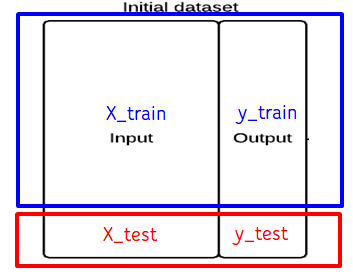

In [ ]:
from sklearn.model_selection import train_test_split

# Répartition des données en partie d'apprentissage et partie de test et ce au niveau des fatures et des labels 

X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.2, random_state=0) 

# random_state doit prendre une valeur exacte pour avoir à chaque fois la même répartition (split)


## 3.3. Machine Learning - Training 

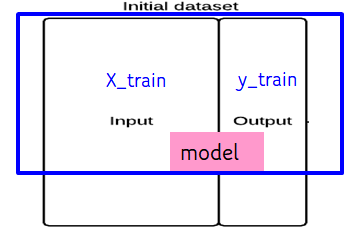

In [ ]:
# Importation du modèle 
from sklearn.naive_bayes import GaussianNB

# Instantiation du modèle 
model = GaussianNB()

# Apprentissage du modèle 
model.fit(X_train, y_train)

## 3.4. Machine Learning - Testing 

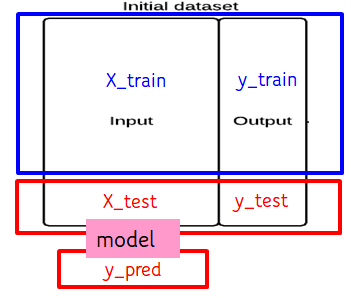

In [ ]:
# Prédiction des labels à partir des échantillon de test
y_pred = model.predict(X_test)

y_pred

## 3.5. Machine Learning - Evaluation

In [ ]:
# Calcul de la métrique accuracy 

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

---
# **Etape 4 : Deployment**
---

Le déploiement se fait selon le principe dump-load

In [ ]:
# pour sauvegarder le modèle réalisé 

from joblib import dump   
dump (model,'model_final.joblib') # fomat .joblib qui est échangé 


In [ ]:
### code à insérer dans la partie web, mobile, embarquée, ... qui utilise le langage python 

### code
from joblib import load

model = load('model_final.joblib')

input_data = get_data() # code à définir aussi


return model.predict(input_data)

### code 